In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from setup import device
from probe_functions import run_probe_experiment

m, n, k = 3, 3, 3

In [ ]:
def plot_confusion_matrix(model, final_embeddings_tensor_sq, board_states_tensor, device, model_num, task):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    model_names = ["Linear", "Small MLP", "Large MLP"]
    model_name = model_names[model_num] if model_num < len(model_names) else f"Model {model_num}"

    model.eval()
    all_preds = []
    all_true = []

    with torch.no_grad():
        for index in range(len(final_embeddings_tensor_sq)):
            sample_embedding = final_embeddings_tensor_sq[index].unsqueeze(0).to(device)
            logits = model(sample_embedding)

            if task == 3:
                pred = torch.argmax(logits, dim=-1).item()
                true = board_states_tensor[index].item()
                all_preds.append(pred)
                all_true.append(true)
            else:
                logits = logits.view(1, 9, 3)  # Assumes 3x3 board
                predicted_classes = torch.argmax(logits, dim=-1).squeeze().cpu().numpy()
                true_board_state = board_states_tensor[index].cpu().numpy()

                all_preds.extend(predicted_classes)
                all_true.extend(true_board_state)

    # Compute and plot confusion matrix
    num_classes = 2 if task == 3 else 3
    labels = list(range(num_classes))
    cm = confusion_matrix(all_true, all_preds, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[str(i) for i in labels],
                yticklabels=[str(i) for i in labels])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    title = "Winner Prediction" if task == 3 else "Board State Classification"
    plt.title(f'Confusion Matrix: {title} ({model_name})')
    plt.show()


In [2]:
def plot_confusion_matrix(model, final_embeddings_tensor_sq, board_states_tensor, device, model_num):
    model_name = "Small MLP"
    if model_num == 0:
        model_name = "Linear"
    elif model_num == 2:
        model_name = "Large MLP"
    model.eval()  # Set the model to evaluation mode
    
    all_preds = []
    all_true = []

    with torch.no_grad():
        for index in range(len(final_embeddings_tensor_sq)):
            sample_embedding = final_embeddings_tensor_sq[index].unsqueeze(0).to(device)
            logits = model(sample_embedding)
            logits = logits.view(1, 9, 3)
            predicted_classes = torch.argmax(logits, dim=-1).squeeze().cpu().numpy()
            true_board_state = board_states_tensor[index].cpu().numpy()

            all_preds.extend(predicted_classes)
            all_true.extend(true_board_state)

    # Compute confusion matrix
    cm = confusion_matrix(all_true, all_preds, labels=[0, 1, 2])

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Board State Classification for {model_name} model')
    plt.show()

/Users/rajenparekh/Desktop/Brown/2024-25/Senior Thesis/mnk_transformer/setup.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_loca

Model has 1 transformer layers, 3 total activations
On sequence 0/100000
On sequence 1000/100000
On sequence 2000/100000
On sequence 3000/100000
On sequence 4000/100000
On sequence 5000/100000
On sequence 6000/100000
On sequence 7000/100000
On sequence 8000/100000
On sequence 9000/100000
On sequence 10000/100000
On sequence 11000/100000
On sequence 12000/100000
On sequence 13000/100000
On sequence 14000/100000
On sequence 15000/100000
On sequence 16000/100000
On sequence 17000/100000
On sequence 18000/100000
On sequence 19000/100000
On sequence 20000/100000
On sequence 21000/100000
On sequence 22000/100000
On sequence 23000/100000
On sequence 24000/100000
On sequence 25000/100000
On sequence 26000/100000
On sequence 27000/100000
On sequence 28000/100000
On sequence 29000/100000
On sequence 30000/100000
On sequence 31000/100000
On sequence 32000/100000
On sequence 33000/100000
On sequence 34000/100000
On sequence 35000/100000
On sequence 36000/100000
On sequence 37000/100000
On sequence

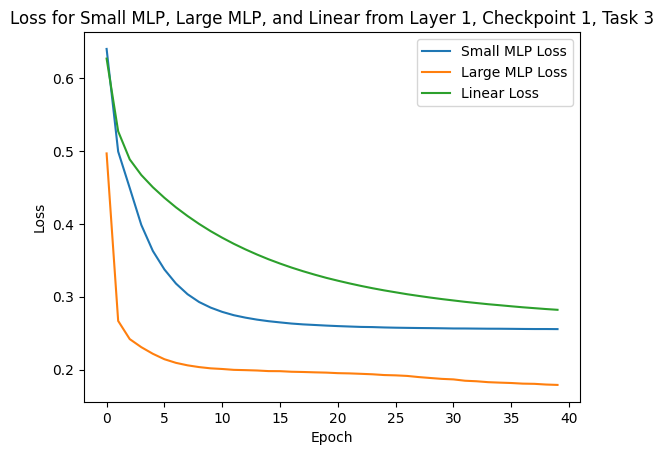

Final board accuracy for Small MLP = 0.91905
Final board accuracy for Large MLP = 0.9199
Final board accuracy for Linear = 0.9172
Final space accuracy for Small MLP = 0
Final space accuracy for Large MLP = 0
Final space accuracy for Linear = 0


NameError: name 'linear_model' is not defined

In [3]:
for task in range(3, 4):
    if task == 0:
        print("Task 0: Predicting occupancy with my/yours")
    elif task == 1:
        print("Task 1: Predicting occupancy with P1/P2")
    elif task == 2:
        print("Task 2: Predicting occupancy, ignoring player")
    for v, name_opt in enumerate(['ckpt1', 'ckpt2', 'ckpt3', 'ckpt4']):
        (layer_num_to_results, train_board_states_tensor, test_board_states_tensor) = run_probe_experiment(task, m, n, k, out_dir='probing_checkpoints', name=name_opt)

        print(f'Displaying results for checkpoint {v + 1}')

        for i, layer_res in layer_num_to_results.items():
            print(f"Results from activations in Layer {i + 1}, Checkpoint {v + 1}, Task {task}")
            for j, dic in enumerate(layer_res):
                if j == 0:
                    plt.plot(dic['small mlp'], label='Small MLP Loss')
                    plt.plot(dic['large mlp'], label='Large MLP Loss')
                    plt.plot(dic['linear'], label='Linear Loss')
                    plt.xlabel('Epoch')
                    plt.ylabel('Loss')
                    plt.title(f'Loss for Small MLP, Large MLP, and Linear from Layer {i + 1}, Checkpoint {v + 1}, Task {task}')
                    plt.legend()
                    plt.show()
                elif j == 1:
                    print(f"Final board accuracy for Small MLP = {dic['small mlp']}")
                    print(f"Final board accuracy for Large MLP = {dic['large mlp']}")
                    print(f"Final board accuracy for Linear = {dic['linear']}")
                elif j == 2:
                    print(f"Final space accuracy for Small MLP = {dic['small mlp']}")
                    print(f"Final space accuracy for Large MLP = {dic['large mlp']}")
                    print(f"Final space accuracy for Linear = {dic['linear']}")
                elif j == 3:
                    mlp_model_small = dic
                elif j == 4:
                    mlp_model_large = dic
                elif j == 5:
                    linear_model = dic
                elif j == 6:
                    train_activations_tensor = dic
                elif j == 7:
                    test_activations_tensor = dic
            for model_num, model in enumerate([linear_model, mlp_model_small, mlp_model_large]):
                plot_confusion_matrix(model, test_activations_tensor, test_board_states_tensor, device=device, model_num=model_num)